<a href="https://colab.research.google.com/github/SudiptaSarkar1305/Exploratory-Data-Analysis/blob/main/Exploratory_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ciol-researchlab/CIOL-Winter-ML-Bootcamp.git

Cloning into 'CIOL-Winter-ML-Bootcamp'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 124 (delta 25), reused 113 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (124/124), 18.42 MiB | 11.10 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('/content/CIOL-Winter-ML-Bootcamp/datasets/session1/assignment/o2/data.csv')

**DATA** **OVERVIEW**

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.shape

(10000, 10)

In [ ]:
df= df.set_index('UDI')

In [ ]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
print(f'Dataset Size: {df.shape}')

Dataset Size: (10000, 9)


In [ ]:
df.dtypes

,0
Product ID,object
Type,object
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],int64
Torque [Nm],float64
Tool wear [min],int64
Target,int64
Failure Type,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Target                   10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 781.2+ KB


In [ ]:
print(df.isnull().sum())

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [ ]:
df.nunique()

,0
Product ID,10000
Type,3
Air temperature [K],93
Process temperature [K],82
Rotational speed [rpm],941
Torque [Nm],577
Tool wear [min],246
Target,2
Failure Type,6


**DESCRIPTIVE STATISTICS**

In [ ]:
#Summary of numerical features
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
#Summary of categorical features
print(df.select_dtypes(include=['object']).describe())

       Product ID   Type Failure Type
count       10000  10000        10000
unique      10000      3            6
top        M14860      L   No Failure
freq            1   6000         9652


**UNIVARIATE ANALYSIS**

In [ ]:
numerical_columns= df.select_dtypes(include=['number']).columns.tolist()
print('Numerical columns:', numerical_columns)

Numerical columns: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']


In [ ]:
categorical_columns= df.select_dtypes(include=['object']).columns.tolist()
print('Categorical columns:', categorical_columns)

Categorical columns: ['Product ID', 'Type', 'Failure Type']


In [ ]:
categorical_columns.remove('Product ID')
print('Categorical columns:', categorical_columns)

Categorical columns: ['Type', 'Failure Type']


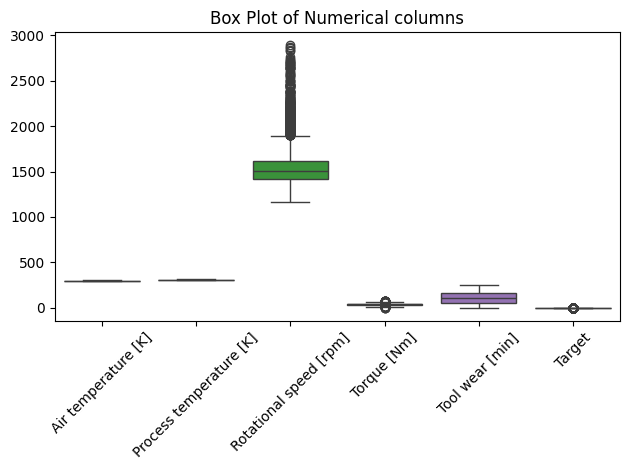

In [ ]:
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plot of Numerical columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show;

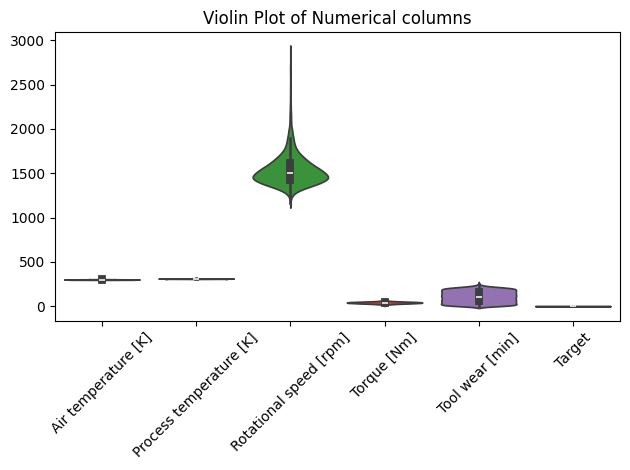

In [ ]:
sns.violinplot(data=df[numerical_columns])
plt.title('Violin Plot of Numerical columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show;

The above two plots shows outliers in Rotational speed[rpm]

In [ ]:
Q1= df['Rotational speed [rpm]'].quantile(0.25)
Q3= df['Rotational speed [rpm]'].quantile(0.75)
IQR= Q3-Q1
lower_bound= Q1-1.5*IQR
upper_bound= Q3+ 1.5*IQR

In [ ]:
outliers= df[(df['Rotational speed [rpm]']<lower_bound) | (df['Rotational speed [rpm]']> upper_bound )]
outliers['Rotational speed [rpm]']

,Rotational speed [rpm]
UDI,
15,2035
51,2861
71,1924
102,1991
156,1987
...,...
9866,2450
9872,1947
9887,1903


In [ ]:
df_cleaned= df[(df['Rotational speed [rpm]']>=lower_bound) & (df['Rotational speed [rpm]']<= upper_bound )]
df_cleaned.shape

(9582, 9)

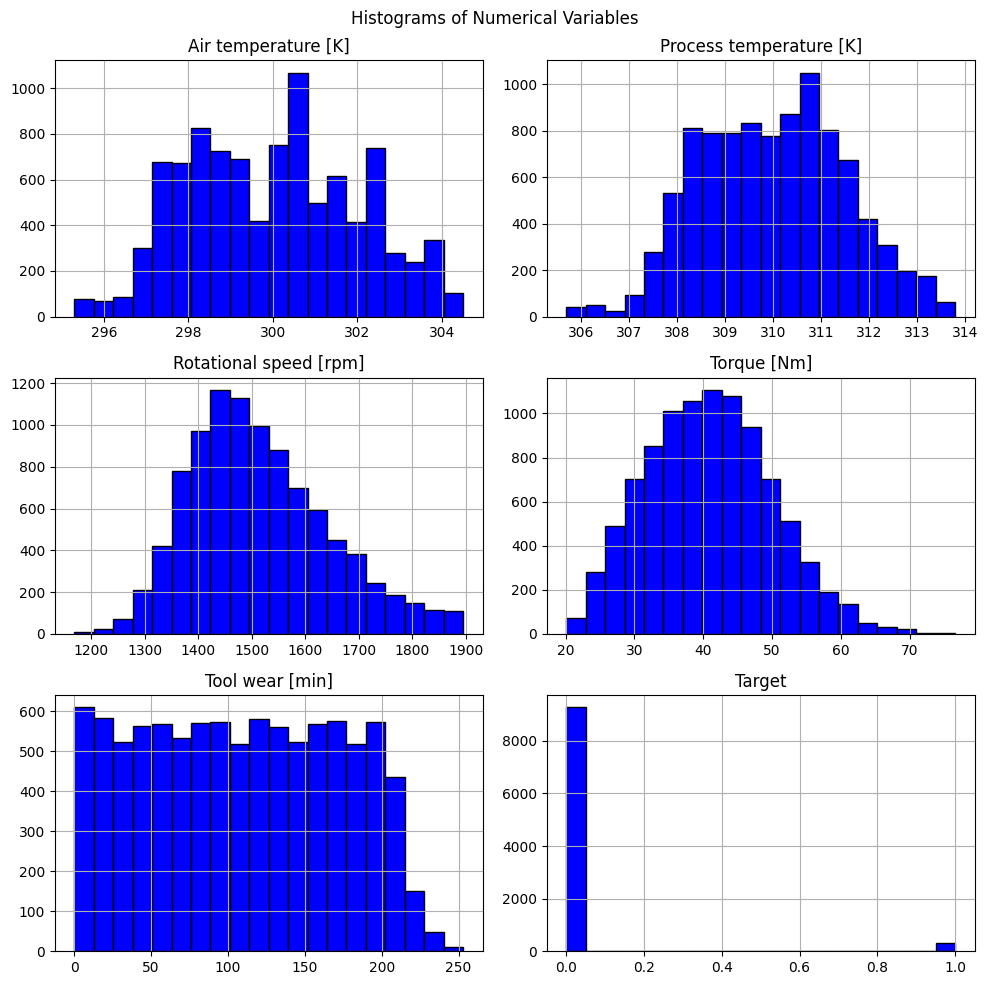

In [ ]:
df_cleaned[numerical_columns].hist(bins=20, figsize=(10, 10), layout=(3, 2), color="blue", edgecolor="black")
plt.suptitle('Histograms of Numerical Variables')
plt.tight_layout()
plt.show()

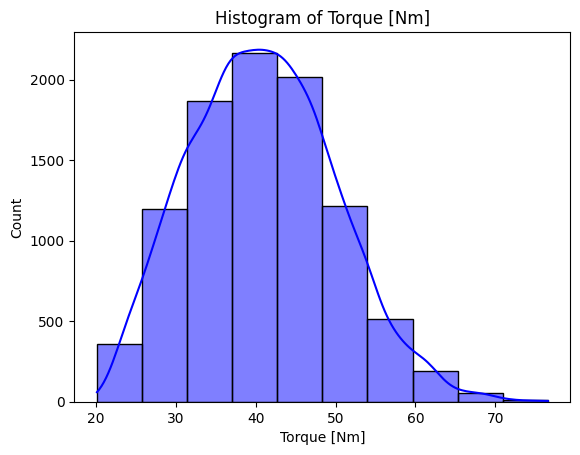

In [ ]:
sns.histplot(df_cleaned['Torque [Nm]'], kde=True, bins=10, color='blue')
plt.title(f'Histogram of Torque [Nm]')
plt.show()

In [ ]:
from scipy import stats

def normality_test(df_cleaned, column, alpha=0.05):

    data = df_cleaned[column]
    # Perform the Shapiro-Wilk test for normality
    stat, p_value = stats.shapiro(data)

    # Check if p-value is less than alpha (significance level)
    if p_value > alpha:
        return f"Data of {column} column is normally distributed (p-value = {p_value:.4f})"
    else:
        return f"Data of {column} column is NOT normally distributed (p-value = {p_value:.4f})"

normality_test(df_cleaned, numerical_columns[0])

'Data of Air temperature [K] column is NOT normally distributed (p-value = 0.0000)'

In [ ]:
normality_test(df_cleaned, numerical_columns[1])

'Data of Process temperature [K] column is NOT normally distributed (p-value = 0.0000)'

In [ ]:
normality_test(df_cleaned, numerical_columns[2])

'Data of Rotational speed [rpm] column is NOT normally distributed (p-value = 0.0000)'

In [ ]:
normality_test(df_cleaned, numerical_columns[3])

'Data of Torque [Nm] column is NOT normally distributed (p-value = 0.0000)'

In [ ]:
normality_test(df_cleaned, numerical_columns[4])

'Data of Tool wear [min] column is NOT normally distributed (p-value = 0.0000)'

In [ ]:
normality_test(df_cleaned, numerical_columns[5])

'Data of Target column is NOT normally distributed (p-value = 0.0000)'

In [ ]:
print(df_cleaned[categorical_columns[0]].value_counts())

Type
L    5744
M    2872
H     966
Name: count, dtype: int64


In [ ]:
print(df_cleaned[categorical_columns[1]].value_counts())

Failure Type
No Failure                  9269
Heat Dissipation Failure     112
Overstrain Failure            78
Power Failure                 64
Tool Wear Failure             41
Random Failures               18
Name: count, dtype: int64


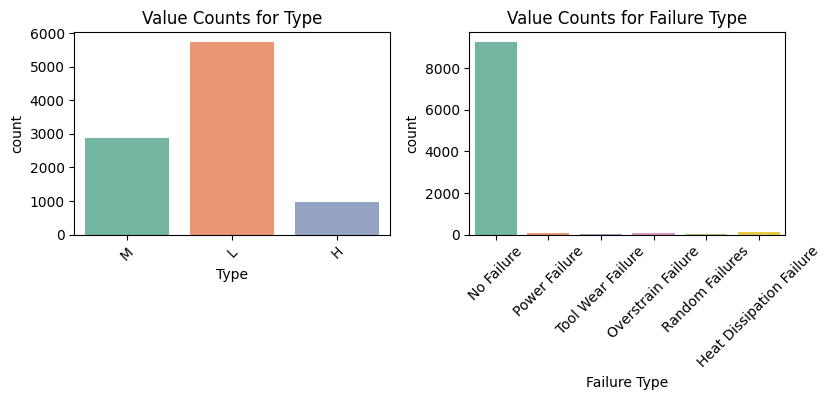

In [ ]:
plt.figure(figsize=(12, 10))

# Plot each categorical column's value counts
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)  # Adjust grid size (3x3 here)
    sns.countplot(x=col, data=df_cleaned, palette='Set2')
    plt.title(f'Value Counts for {col}')
    plt.xticks(rotation=45)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

**BIVARIATE ANALYSIS**

In [ ]:
df_cleaned.groupby('Target')['Torque [Nm]'].mean()

,Torque [Nm]
Target,
0,40.458806
1,54.600987


In [ ]:
df_cleaned.groupby('Type')['Torque [Nm]'].mean()

,Torque [Nm]
Type,
H,40.656625
L,40.934366
M,40.938092


In [ ]:
df_cleaned.groupby('Type')['Rotational speed [rpm]'].mean()

,Rotational speed [rpm]
Type,
H,1516.265010
L,1514.350627
M,1513.218663


In [ ]:
df_cleaned.groupby(['Type', 'Failure Type']).agg({
    'Air temperature [K]': ['mean','count'],
    'Process temperature [K]': ['mean','count'],
    'Rotational speed [rpm]': ['mean','count'],
    'Torque [Nm]': ['mean', 'count'],
    'Tool wear [min]' : ['mean', 'count']
}).reset_index()

Type              Failure Type Air temperature [K]        \
                                                 mean count   
0     H  Heat Dissipation Failure          302.700000     8   
1     H                No Failure          299.839236   943   
2     H        Overstrain Failure          302.800000     1   
3     H             Power Failure          300.450000     4   
4     H           Random Failures          300.825000     4   
5     H         Tool Wear Failure          299.800000     6   
6     L  Heat Dissipation Failure          302.582432    74   
7     L                No Failure          299.968188  5523   
8     L        Overstrain Failure          299.787671    73   
9     L             Power Failure          300.266667    39   
10    L           Random Failures          301.116667    12   
11    L         Tool Wear Failure          300.447826    23   
12    M  Heat Dissipation Failure          302.496667    30   
13    M                No Failure          299.991723  2803   
14    M        Overstrain Failure          300.600000     4   
15    M             Power Failure          299.447619    21   
16    M           Random Failures          298.550000     2   
17    M         Tool Wear Failure          300.358333    12   

   Process temperature [K]       Rotational speed [rpm]       Torque [Nm]  \
                      mean count                   mean count        mean   
0               310.950000     8            1322.375000     8   55.137500   
1               309.916967   943            1518.983033   943   40.401697   
2               312.400000     1            1411.000000     1   53.800000   
3               310.225000     4            1336.250000     4   67.250000   
4               310.650000     4            1505.750000     4   41.275000   
5               309.316667     6            1492.166667     6   41.083333   
6               310.813514    74            1336.256757    74   52.982432   
7               309.993572  5523            1520.109542  5523   40.385316   
8               309.997260    73            1356.246575    73   56.597260   
9               310.141026    39            1339.974359    39   66.897436   
10              311.125000    12            1475.083333    12   45.350000   
11              310.195652    23            1522.434783    23   37.973913   
12              310.723333    30            1346.333333    30   51.646667   
13              310.005780  2803            1516.465929  2803   40.607100   
14              310.450000     4            1303.500000     4   62.775000   
15              309.457143    21            1342.619048    21   66.704762   
16              308.750000     2            1543.000000     2   37.050000   
17              310.433333    12            1535.416667    12   39.758333   

         Tool wear [min]        
   count            mean count  
0      8       87.750000     8  
1    943      106.630965   943  
2      1      246.000000     1  
3      4      157.000000     4  
4      4       55.250000     4  
5      6      220.833333     6  
6     74      106.932432    74  
7   5523      106.638240  5523  
8     73      208.109589    73  
9     39       97.666667    39  
10    12      142.500000    12  
11    23      214.956522    23  
12    30      113.566667    30  
13  2803      106.872280  2803  
14     4      200.750000     4  
15    21      106.952381    21  
16     2      113.500000     2  
17    12      218.166667    12

In [ ]:
corr_matrix = df_cleaned[numerical_columns].corr()


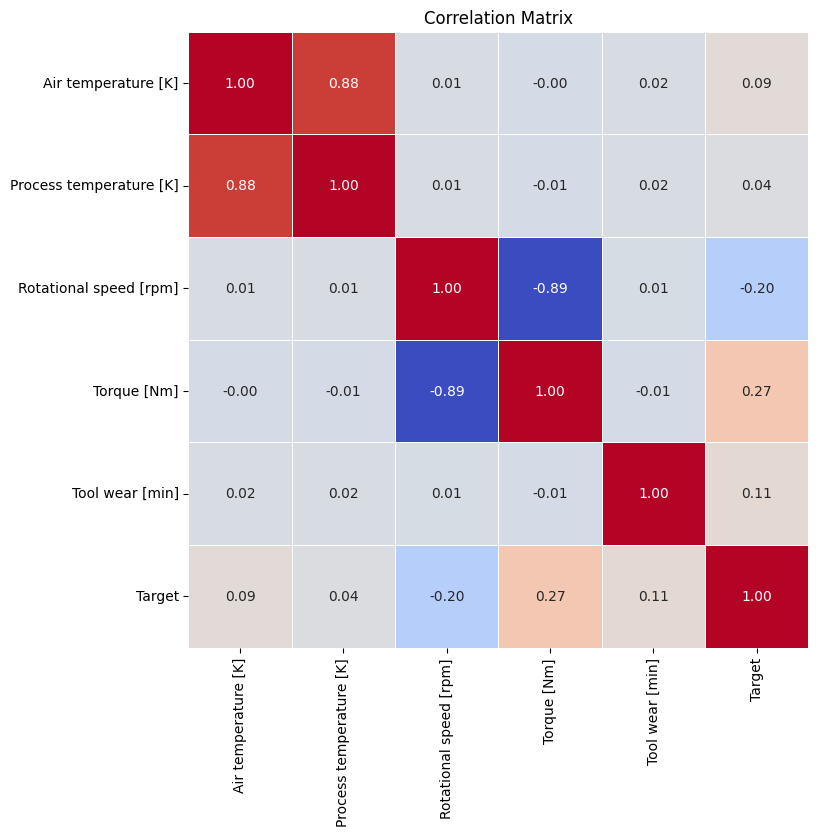

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From the above correlation heatmap we can see that there is strong positive correlation between Process temperature[k] and Air temperature[k]. Also a strong negetive correlation between Rotational speed[rpm] and Tourque[Nm].

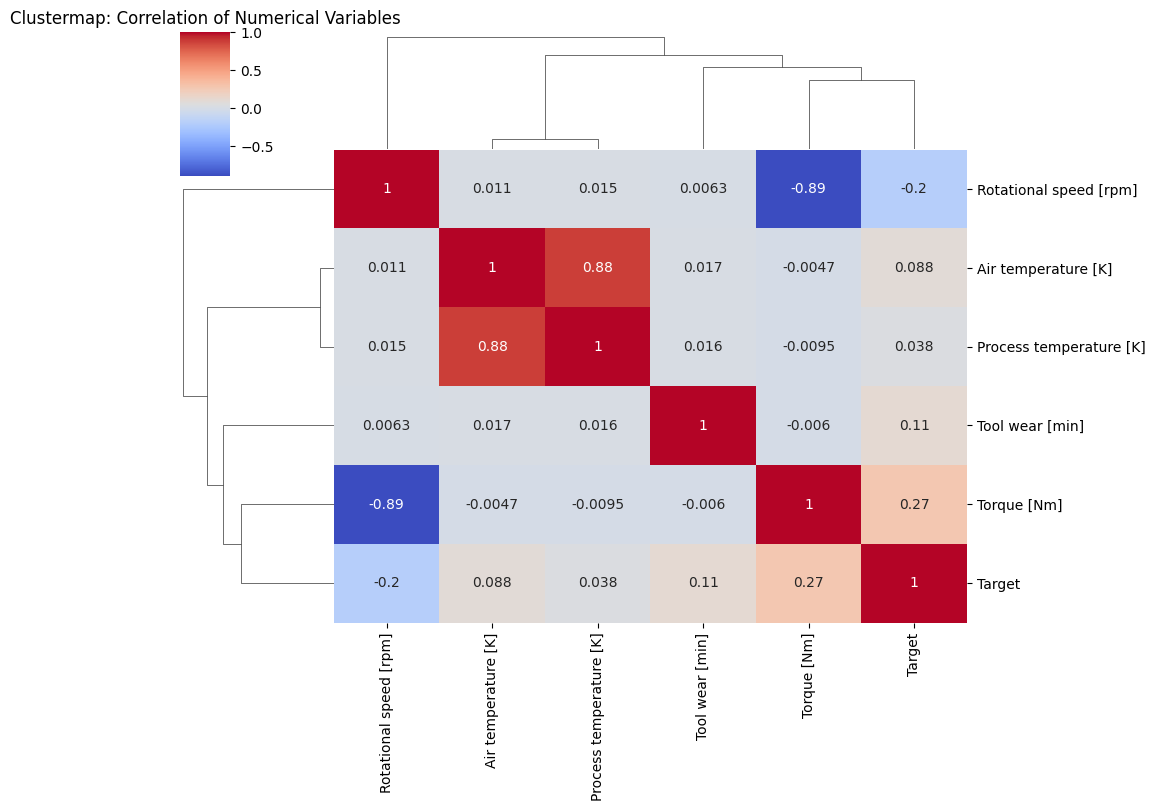

In [ ]:
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', figsize=(10, 8))
plt.title('Clustermap: Correlation of Numerical Variables')
plt.show()

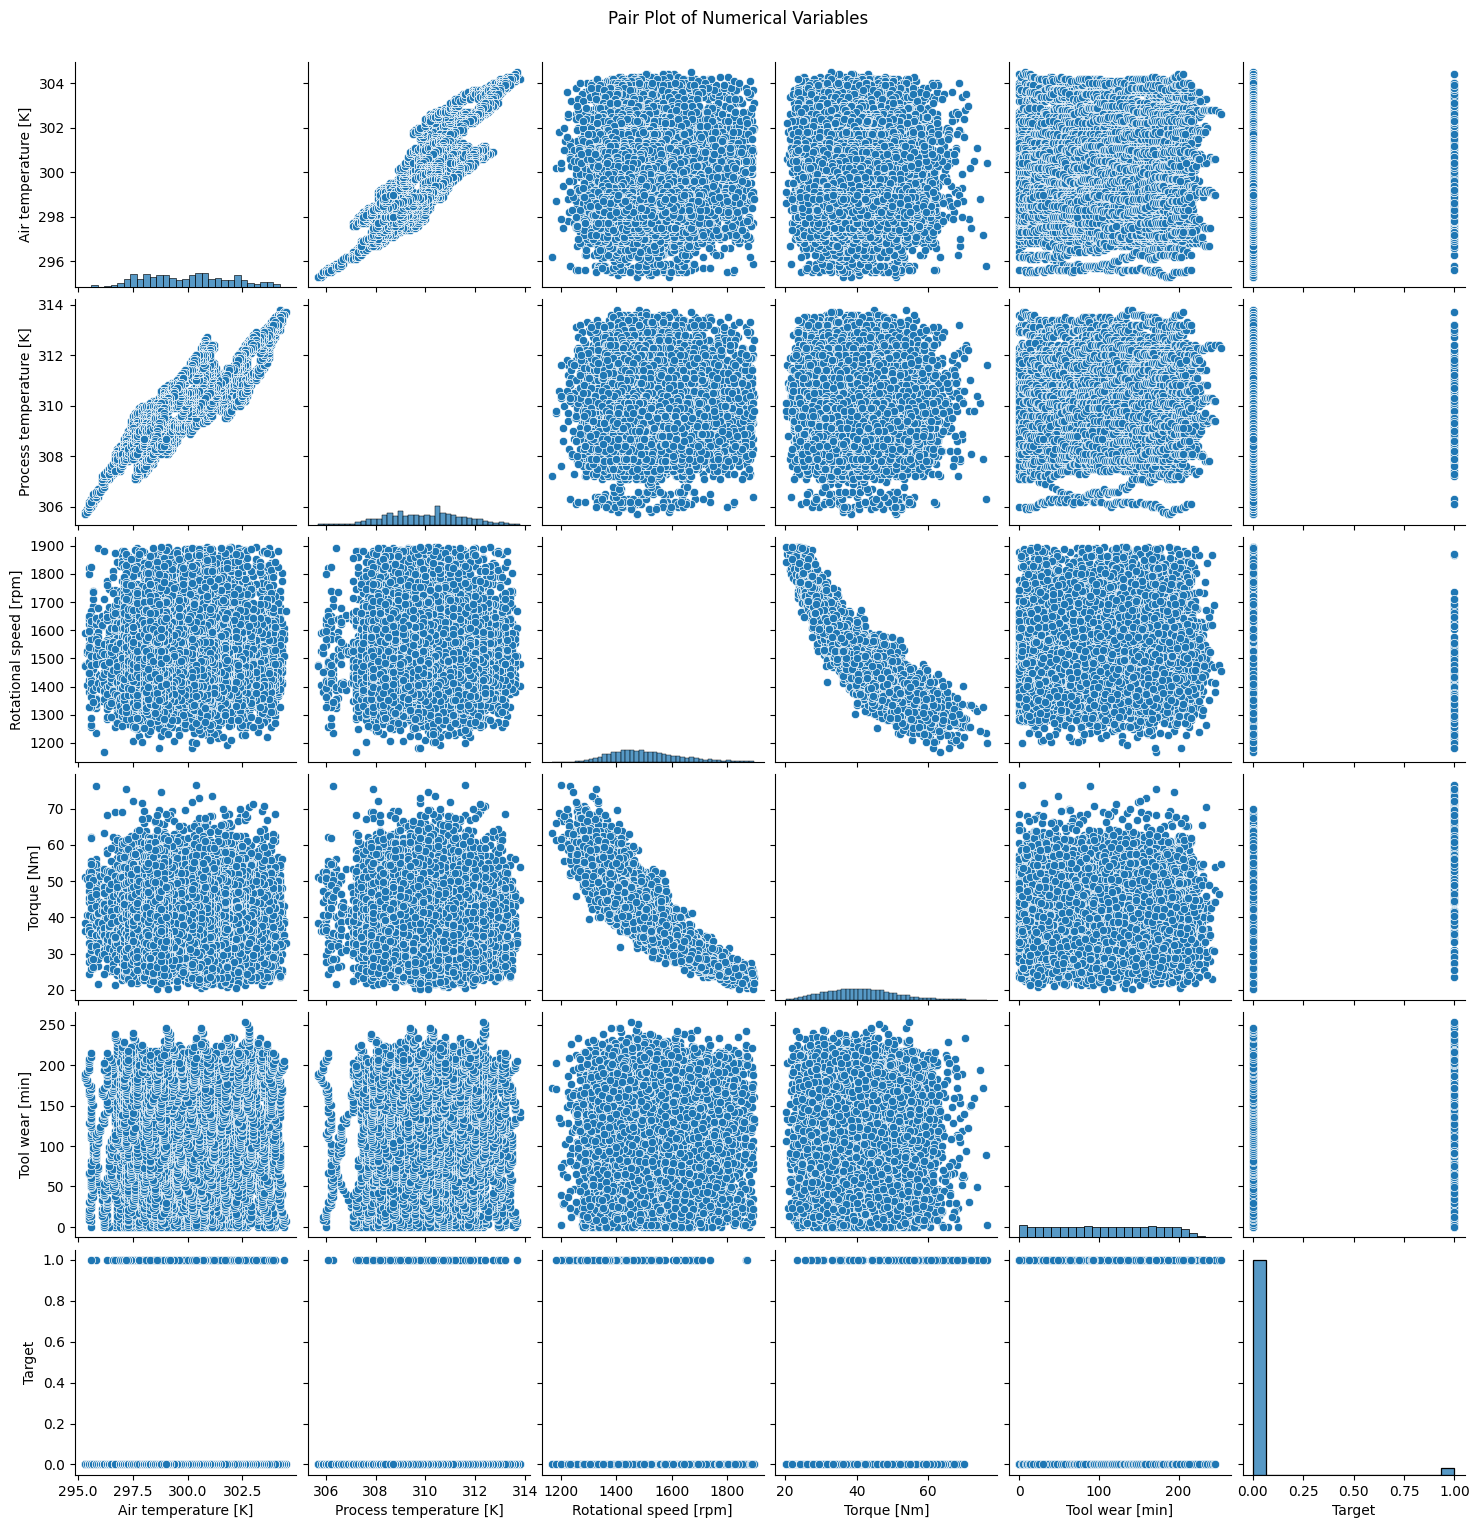

In [ ]:
sns.pairplot(df_cleaned[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

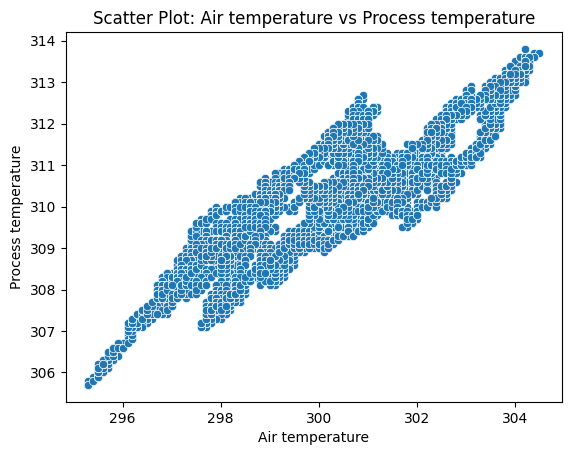

In [ ]:
sns.scatterplot(x='Air temperature [K]', y='Process temperature [K]', data=df_cleaned)
plt.title('Scatter Plot: Air temperature vs Process temperature')
plt.xlabel('Air temperature')
plt.ylabel('Process temperature')
plt.show()

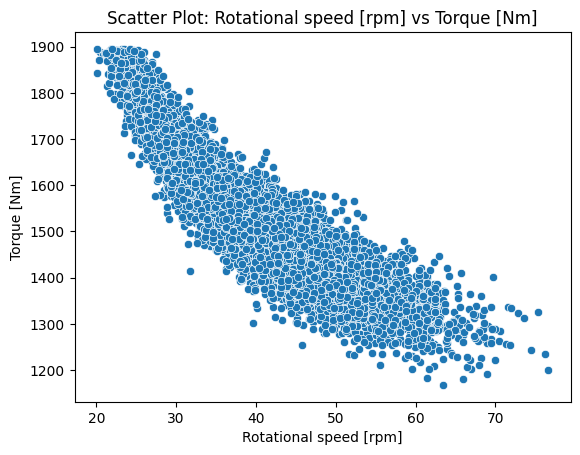

In [ ]:
sns.scatterplot(x='Torque [Nm]',y='Rotational speed [rpm]', data=df_cleaned)
plt.title('Scatter Plot: Rotational speed [rpm] vs Torque [Nm]')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.show()

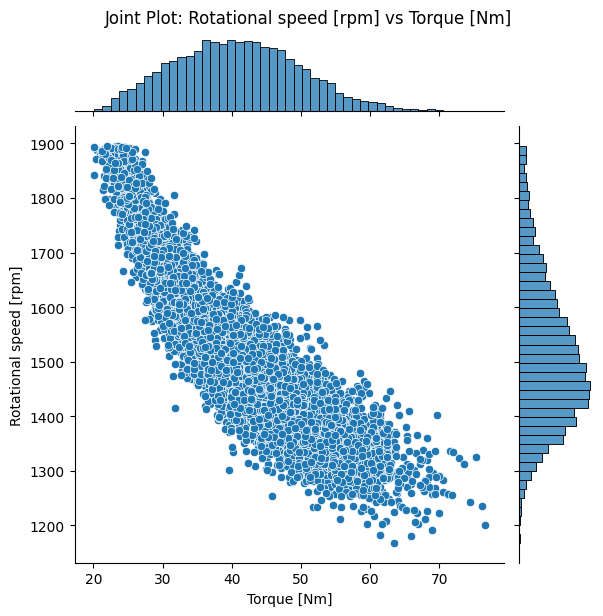

In [ ]:
sns.jointplot( x='Torque [Nm]',y='Rotational speed [rpm]', data=df_cleaned)
plt.suptitle('Joint Plot: Rotational speed [rpm] vs Torque [Nm]', y=1.02)
plt.show()

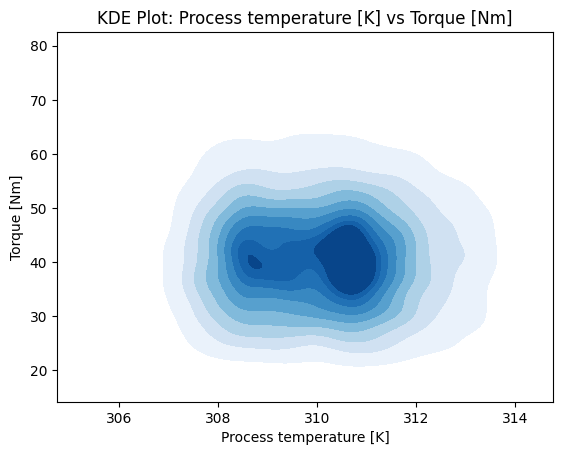

In [ ]:
sns.kdeplot(x='Process temperature [K]', y='Torque [Nm]', data=df_cleaned, cmap='Blues', shade=True, fill=True)
plt.title('KDE Plot: Process temperature [K] vs Torque [Nm]')
plt.show()

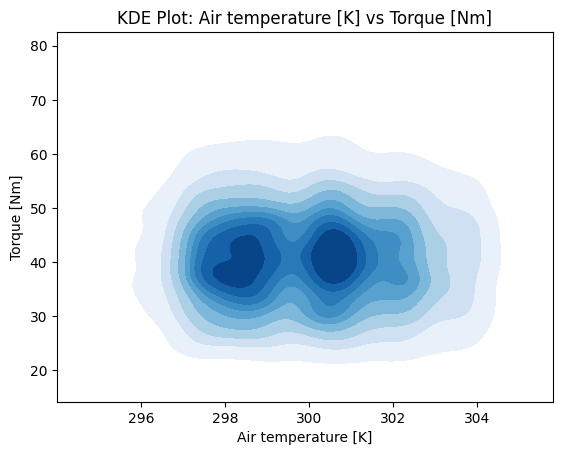

In [ ]:
sns.kdeplot( x='Air temperature [K]',y='Torque [Nm]', data=df_cleaned, cmap='Blues', shade=True, fill=True)
plt.title('KDE Plot: Air temperature [K] vs Torque [Nm]')
plt.show()

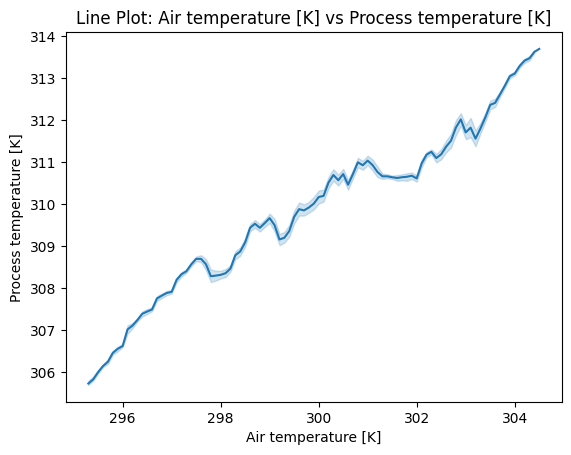

In [ ]:
sns.lineplot(x='Air temperature [K]', y='Process temperature [K]', data=df_cleaned)
plt.title('Line Plot: Air temperature [K] vs Process temperature [K]')
plt.show()

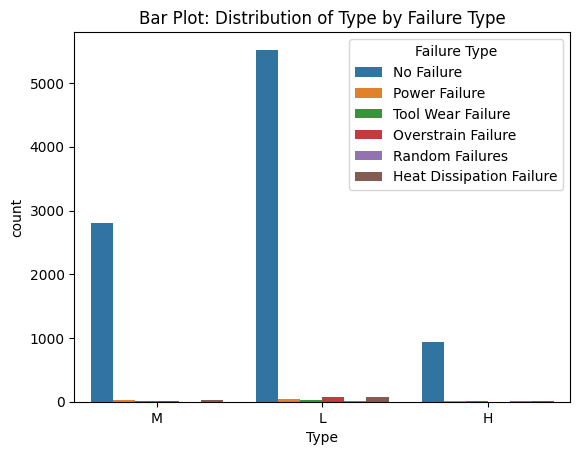

In [ ]:
sns.countplot(x='Type', data=df_cleaned, hue='Failure Type')
plt.title('Bar Plot: Distribution of Type by Failure Type')
plt.show()

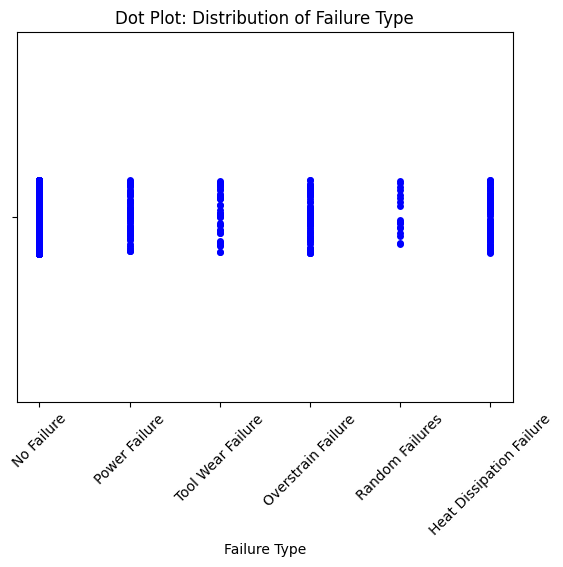

In [ ]:
sns.stripplot(x='Failure Type', data=df_cleaned, jitter=True, size=5, color='blue')
plt.title('Dot Plot: Distribution of Failure Type')
plt.xticks(rotation=45)
plt.show()

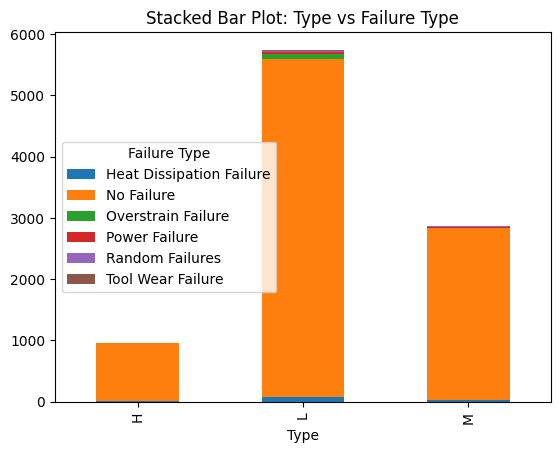

In [ ]:
df_cleaned.groupby(['Type', 'Failure Type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot: Type vs Failure Type')
plt.show()

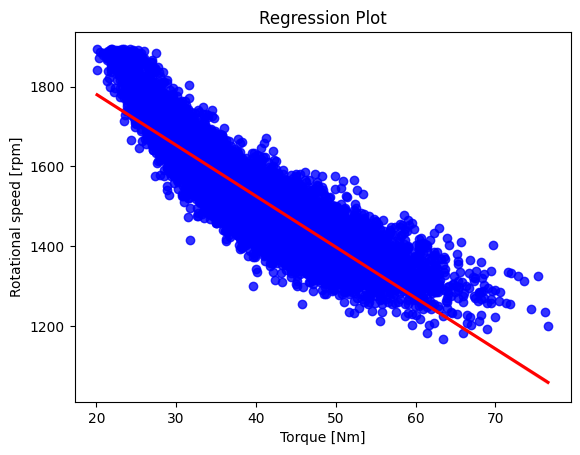

In [ ]:
sns.regplot(
    x ='Torque [Nm]' ,
     y='Rotational speed [rpm]', data=df_cleaned,
     scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}
)
plt.title('Regression Plot')
plt.show()

Above regression plot shows Rotational speed[rpm] is negatively proportionate to Torque[Nm]

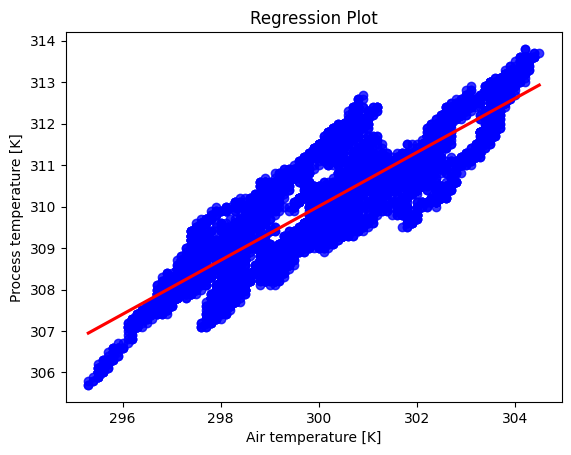

In [ ]:
sns.regplot(
    x='Air temperature [K]', y='Process temperature [K]', data=df_cleaned,
     scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}
)
plt.title('Regression Plot')
plt.show()

Above regression plot shows Process temperature[k] is positively proportionate to Air temperature[k]

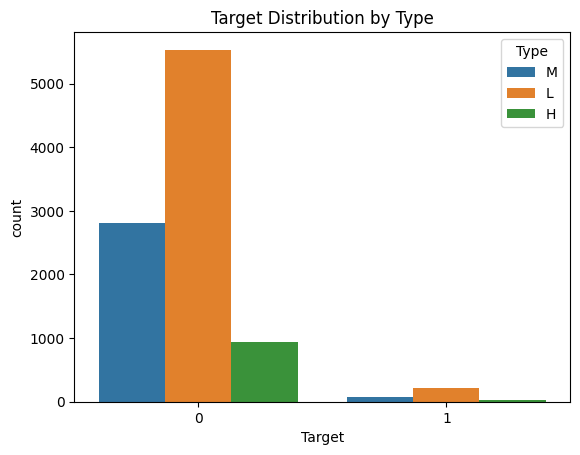

In [ ]:
sns.countplot(x='Target', hue='Type', data=df_cleaned)
plt.title('Target Distribution by Type')
plt.show()

**Aggregating Data to Identify Patterns**

In [ ]:
aggregated_data = df_cleaned.groupby('Type')['Rotational speed [rpm]'].mean().reset_index()
aggregated_data

,Type,Rotational speed [rpm]
0,H,1516.265010
1,L,1514.350627
2,M,1513.218663


In [ ]:
aggregated_data = df_cleaned.groupby('Type')['Torque [Nm]'].mean().reset_index()
aggregated_data

,Type,Torque [Nm]
0,H,40.656625
1,L,40.934366
2,M,40.938092


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = df_cleaned[['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target']]

In [ ]:
kmeans = KMeans(n_clusters=3)
df_cleaned['Cluster'] = kmeans.fit_predict(X)

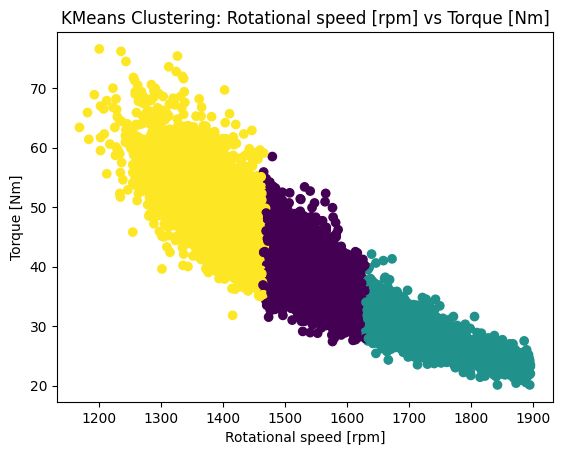

In [ ]:
plt.scatter(df_cleaned['Rotational speed [rpm]'], df_cleaned['Torque [Nm]'], c=df_cleaned['Cluster'], cmap='viridis')
plt.title('KMeans Clustering: Rotational speed [rpm] vs Torque [Nm]')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.show()

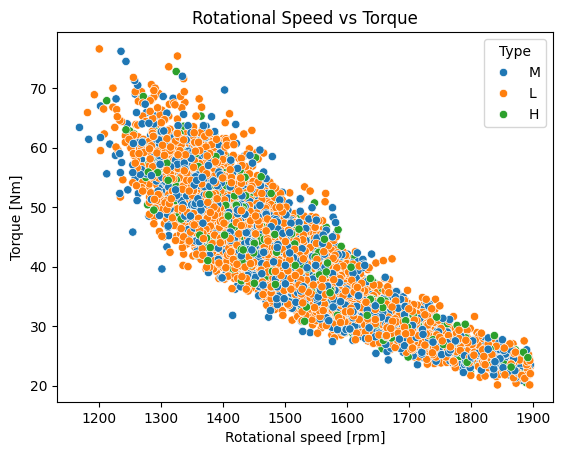

In [ ]:
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', hue='Type', data=df_cleaned)
plt.title('Rotational Speed vs Torque')
plt.show()

**Hypothesis Testing**

We eill test if Torque differs significantly based on Target values.

 **H₀**:  No significant difference in Torque between the groups.

**H₁** : There is a significant difference in Torque between the groups.

If `p-value <= 0.05`, we reject the null hypothesis and conclude that the mean Torque is different for both groups.


In [ ]:
from scipy import stats


In [ ]:
# Split the data by Target
group_0 = df_cleaned[df_cleaned['Target'] == 0]['Torque [Nm]']
group_1 = df_cleaned[df_cleaned['Target'] == 1]['Torque [Nm]']

# Perform t-test
t_stat, p_value = stats.ttest_ind(group_0, group_1)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Torque between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Torque between the groups.")

T-statistic: -27.699135277054864, P-value: 1.6089129040072547e-162
Reject the null hypothesis: There is a significant difference in Torque between the groups.


We eill test if there is any relation between Type and Failure Type

 **H₀**:  No significant relationship between Type and Failure Type.

**H₁** : There is a significant relationship between Type and Failure Type.

If `p-value <= 0.05`, we reject the null hypothesis and conclude that there is a significant relationship between Type and Failure Type.

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_cleaned['Type'], df_cleaned['Failure Type'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, P-value: {p}")

if p < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between Type and Failure Type.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between Type and Failure Type.")


Chi-Square Statistic: 46.29206600342639, P-value: 1.269637087900245e-06
Reject the null hypothesis: There is a significant relationship between Type and Failure Type.


**SUMMARY REPORT**
1. **Dataset Overview**
Total Records: 10,000 rows, 9 columns.

**Index Set**: UDI column.

**Data Types**: Numerical (6), Categorical (2).

**No Missing Values**: Data is clean and ready for analysis.

**Key Features**:
**Numerical**: Air temperature [K], Process temperature [K], Torque [Nm], Rotational speed [rpm], Tool wear [min], Target.
**Categorical**: Type, Failure Type
2. **Descriptive Statistics**

**Numerical Features**:

**Torque** ranges between 3.8 Nm to 80.2 Nm.

**Rotational speed varies** widely, highlighting operational diversity.

**Tool wear** has a maximum value of 280 minutes.

**Categorical Features**:

**Type**: Imbalance observed, with most products being Type L.

**Failure Type**: Majority of observations indicate No Failure.
3. **Key Insights from Analysis**

**Univariate Analysis**:

**Histograms** and **KDE plots** show that most numerical features are not normally distributed.

**Outliers** were detected and removed for Rotational speed [rpm].

**Bivariate Analysis**:


**Correlation Insights**:

**Strong positive correlation**: Air temperature [K] vs. Process temperature [K] (r = 0.85).

**Negative correlation**: Torque [Nm] vs. Rotational speed [rpm] (r = -0.75).

**Failure Type** varies significantly by Type, with Type M showing more failures.

**Hypothesis Testing**:

**Torque vs Target**:
Significant difference in Torque [Nm] between Target groups (p-value < 0.05).

**Type vs Failure Type**:
Significant relationship between Type and Failure Type (p-value < 0.05).